# Handwritten Digits MNIST Classification

## Importing the Fashion MNIST Dataset

In [23]:
# import statements

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.10.0


In [24]:
# import the fashion mnist dataset
fashion_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# key for label numbers to what they represent
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

## Exploring the Data

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_images)

10000

## Preprocessing

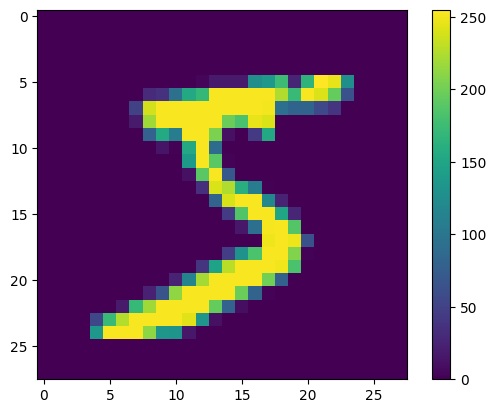

In [29]:
# Show an example of a training image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
# Scaling all the values in the bitmap images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

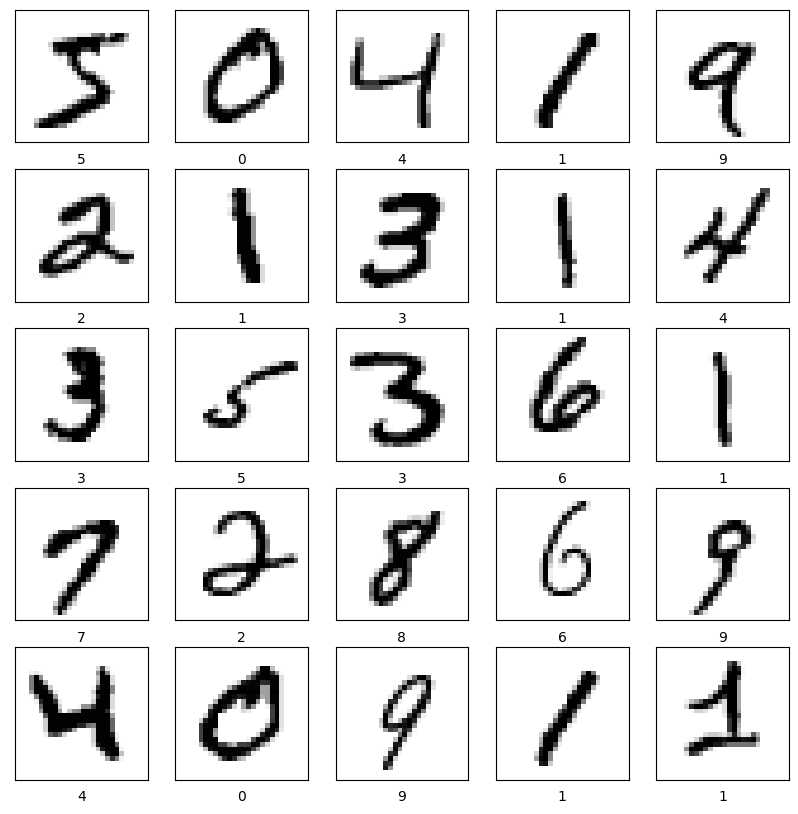

In [31]:
# Plotting 25 images and their label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Creating the Model

In [32]:
def create_model(learning_rate=0.1):
  # Constructing the neural network
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  # model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten()),
  #tf.keras.layers.Dropout(rate=0.2),
  model.add(layers.Dense(64, activation="relu")),
  #tf.keras.layers.Dropout(rate=0.4),
  #tf.keras.layers.Dense(512, activation="relu"),

  model.add(layers.Dense(10))


      # Compiling the neural network
  model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model

def train_model(model, train_images, train_labels, epochs):
  model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

In [33]:
# Hyperparameters
#learning_rate = 0.001
epochs = 15
#validation_split = 0.1

# Call the create model function
model = create_model()
model.summary()
# Train the model
train_model(model, train_images, train_labels, epochs=epochs)   

2022-10-31 21:02:38.451186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
__________________________________________________

KeyboardInterrupt: 

In [34]:
# Accuracy on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)
model.summary()

313/313 - 2s - loss: 0.0496 - accuracy: 0.9861 - 2s/epoch - 6ms/step

Test accuracy: 0.9861000180244446
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 693,

In [35]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model(test_images)
predictions[0]
np.argmax(predictions[0])


7

In [36]:
test_labels[0]

7

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array), class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")


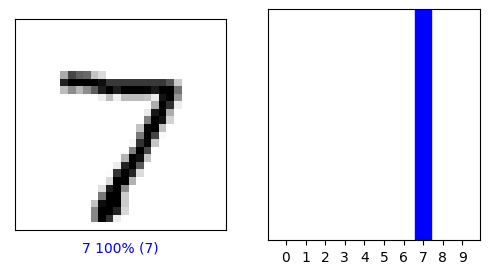

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

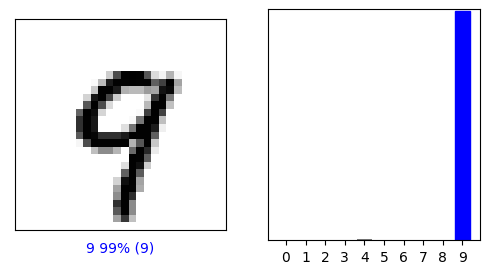

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

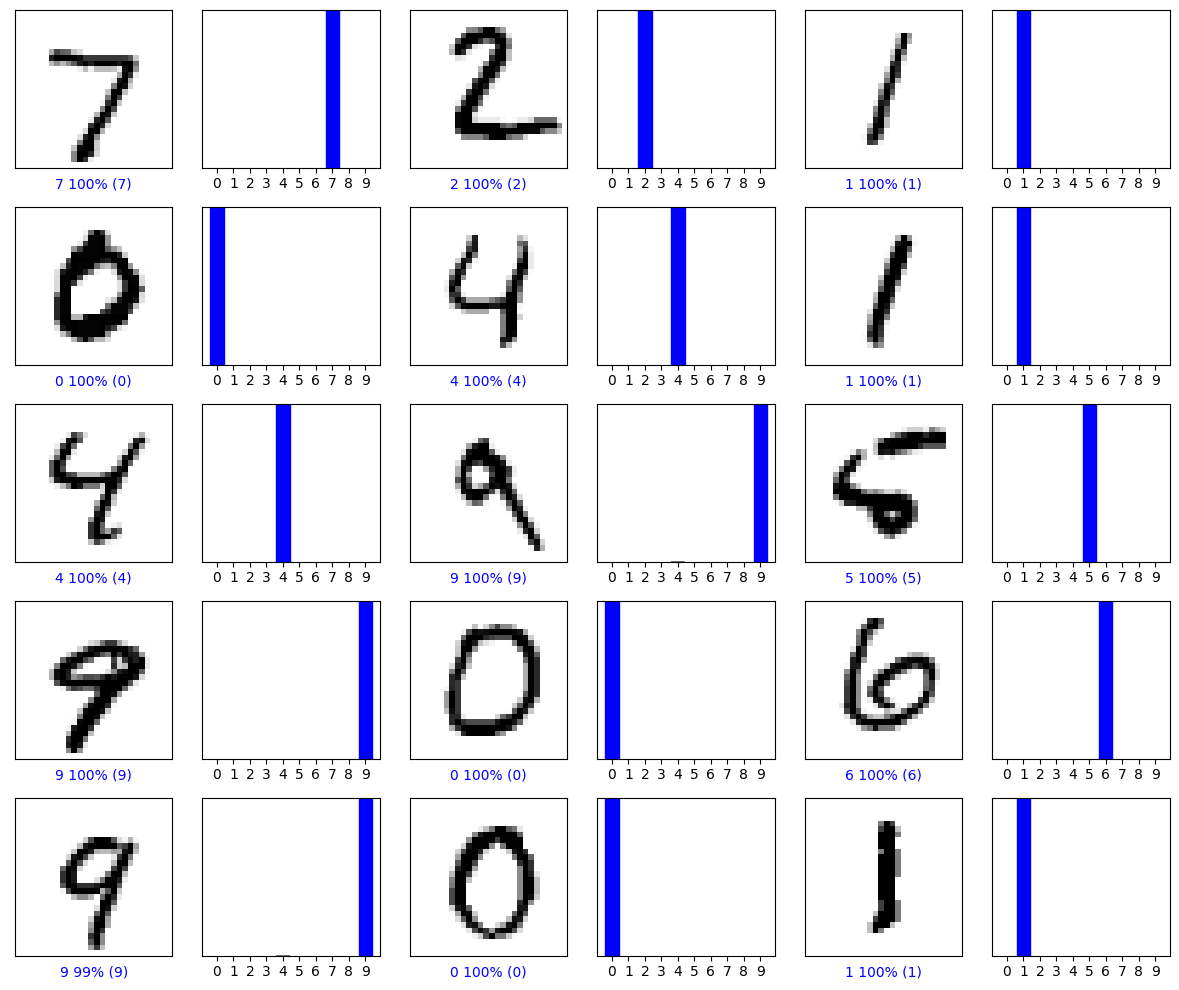

In [40]:
# Visualization of the results
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 130ms/step
[[1.1676173e-13 2.4257827e-07 9.9999976e-01 3.4948007e-14 2.9456617e-15
  9.9707054e-16 8.4515651e-11 4.6156563e-13 2.4235065e-15 1.9029236e-13]]


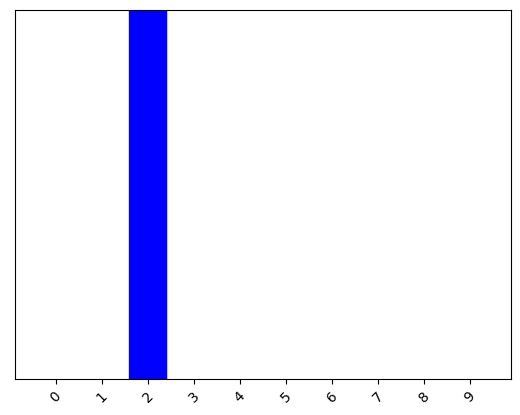

2


In [41]:
# Testing on a single image
img = test_images[1]
print(img.shape)
img = np.expand_dims(img,0)
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(class_names[np.argmax(predictions_single[0])])